In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cal_df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
cal_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


<Axes: xlabel='latitude', ylabel='median_house_value'>

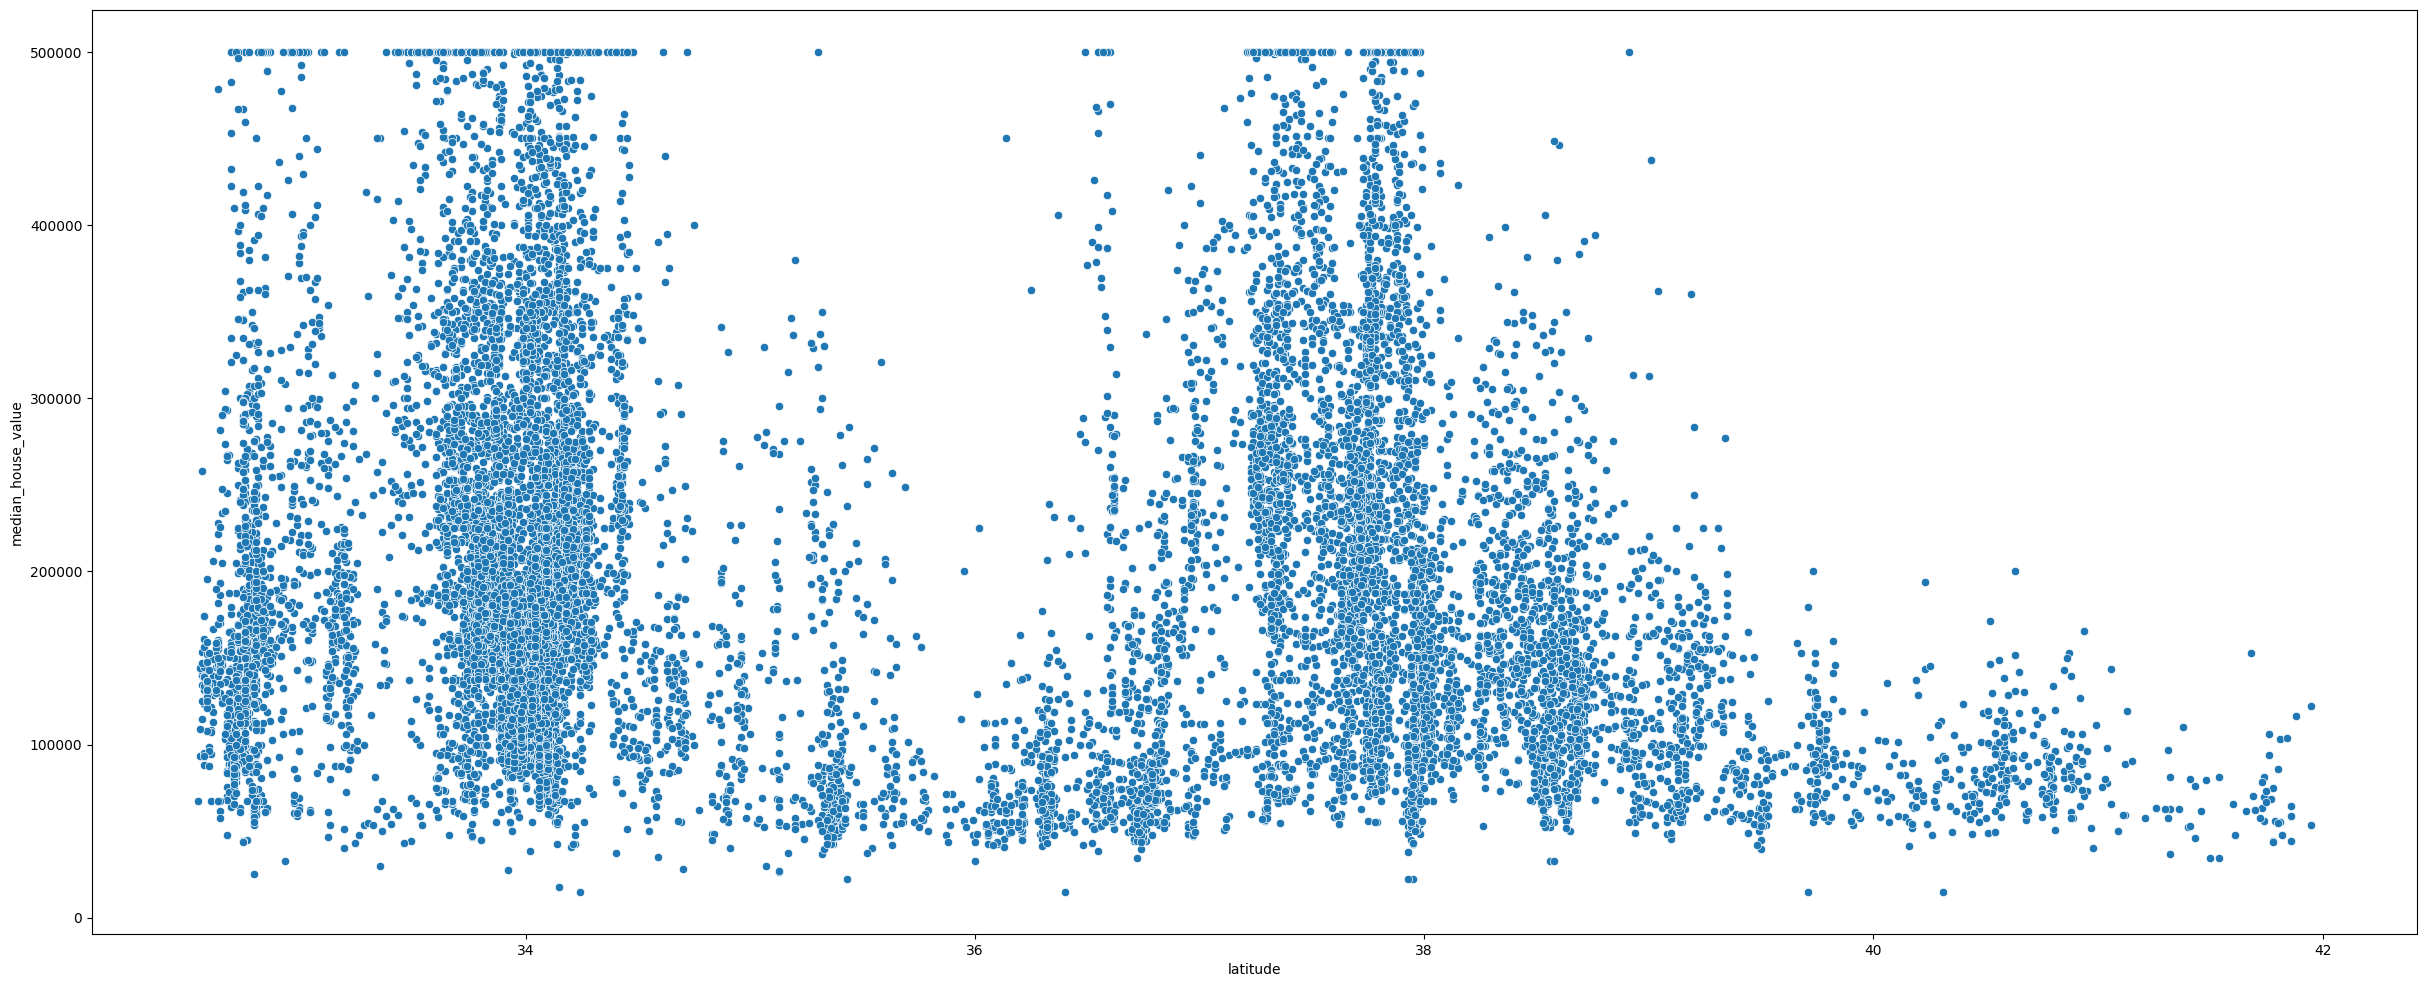

In [ ]:
plt.figure(figsize =(30,12))

sns.scatterplot(x = cal_df['latitude'], y = cal_df['median_house_value'] )

<Axes: ylabel='median_house_value'>

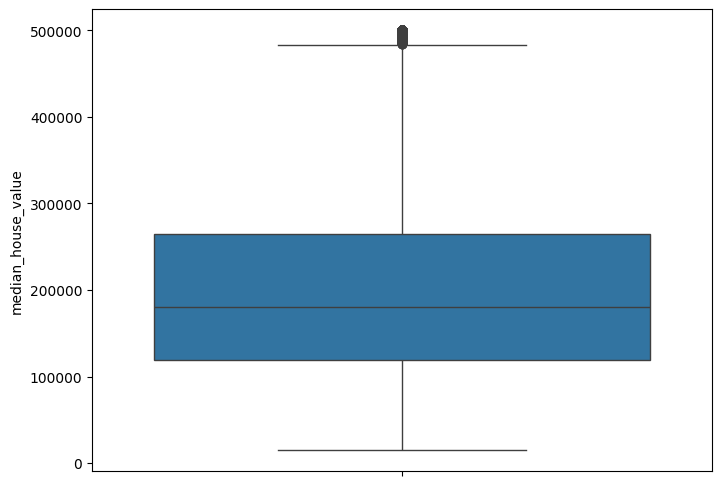

In [ ]:
plt.figure(figsize = (8, 6))

sns.boxplot(cal_df['median_house_value'])

In [ ]:
cal_df.shape

(17000, 9)

In [ ]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
cal_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

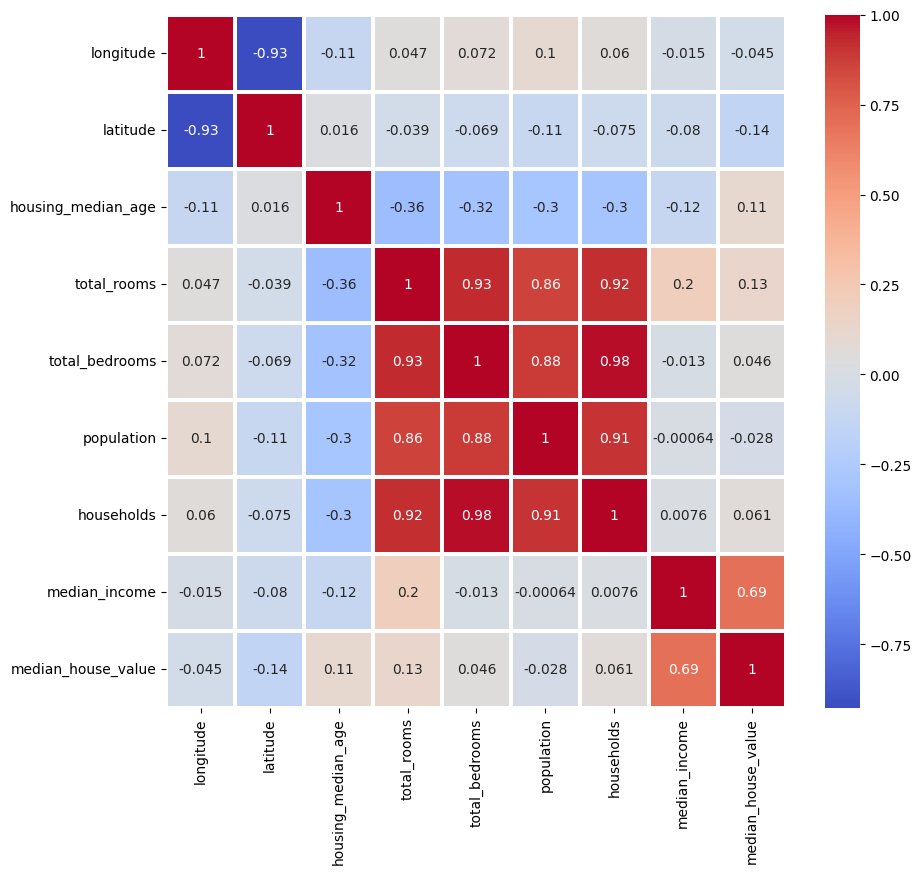

In [ ]:
plt.figure(figsize =(10, 9))

cal_corr = cal_df.corr()

sns.heatmap(cal_corr, annot = True, cmap = 'coolwarm', linewidths = 1.5)


In [ ]:
cal_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
cal_df.drop(['longitude', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)

In [ ]:
cal_df

,latitude,housing_median_age,total_rooms,median_income,median_house_value
0,34.19,15.0,5612.0,1.4936,66900.0
1,34.40,19.0,7650.0,1.8200,80100.0
2,33.69,17.0,720.0,1.6509,85700.0
3,33.64,14.0,1501.0,3.1917,73400.0
4,33.57,20.0,1454.0,1.9250,65500.0
...,...,...,...,...,...
16995,40.58,52.0,2217.0,2.3571,111400.0
16996,40.69,36.0,2349.0,2.5179,79000.0
16997,41.84,17.0,2677.0,3.0313,103600.0
16998,41.80,19.0,2672.0,1.9797,85800.0


<Axes: >

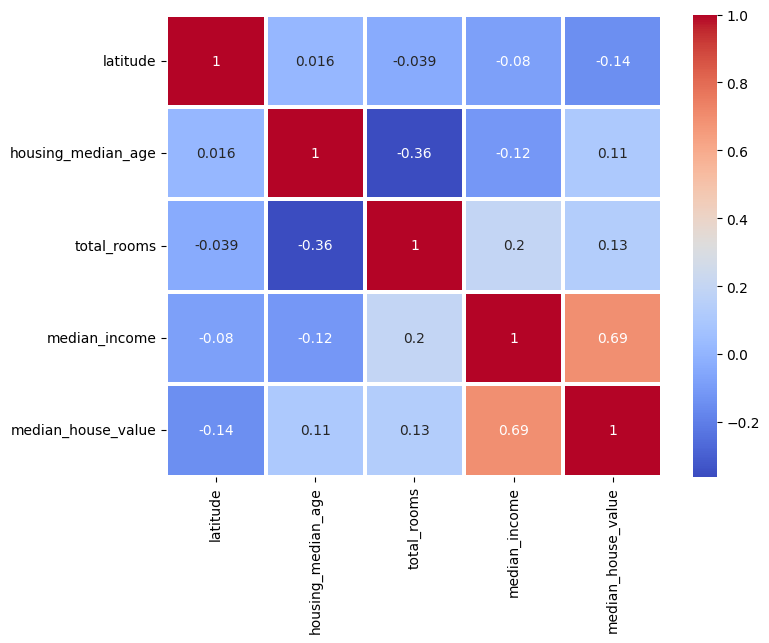

In [ ]:
plt.figure(figsize = (8, 6))

corr = cal_df.corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 1.5)

In [ ]:
cal_df.drop('median_income', axis = 1, inplace = True)

In [ ]:
cal_df

,latitude,housing_median_age,total_rooms,median_house_value
0,34.19,15.0,5612.0,66900.0
1,34.40,19.0,7650.0,80100.0
2,33.69,17.0,720.0,85700.0
3,33.64,14.0,1501.0,73400.0
4,33.57,20.0,1454.0,65500.0
...,...,...,...,...
16995,40.58,52.0,2217.0,111400.0
16996,40.69,36.0,2349.0,79000.0
16997,41.84,17.0,2677.0,103600.0
16998,41.80,19.0,2672.0,85800.0


In [ ]:
cal_df.shape

(17000, 4)

In [ ]:
cal_df.isna().sum()

,0
latitude,0
housing_median_age,0
total_rooms,0
median_house_value,0


<Axes: xlabel='latitude', ylabel='median_house_value'>

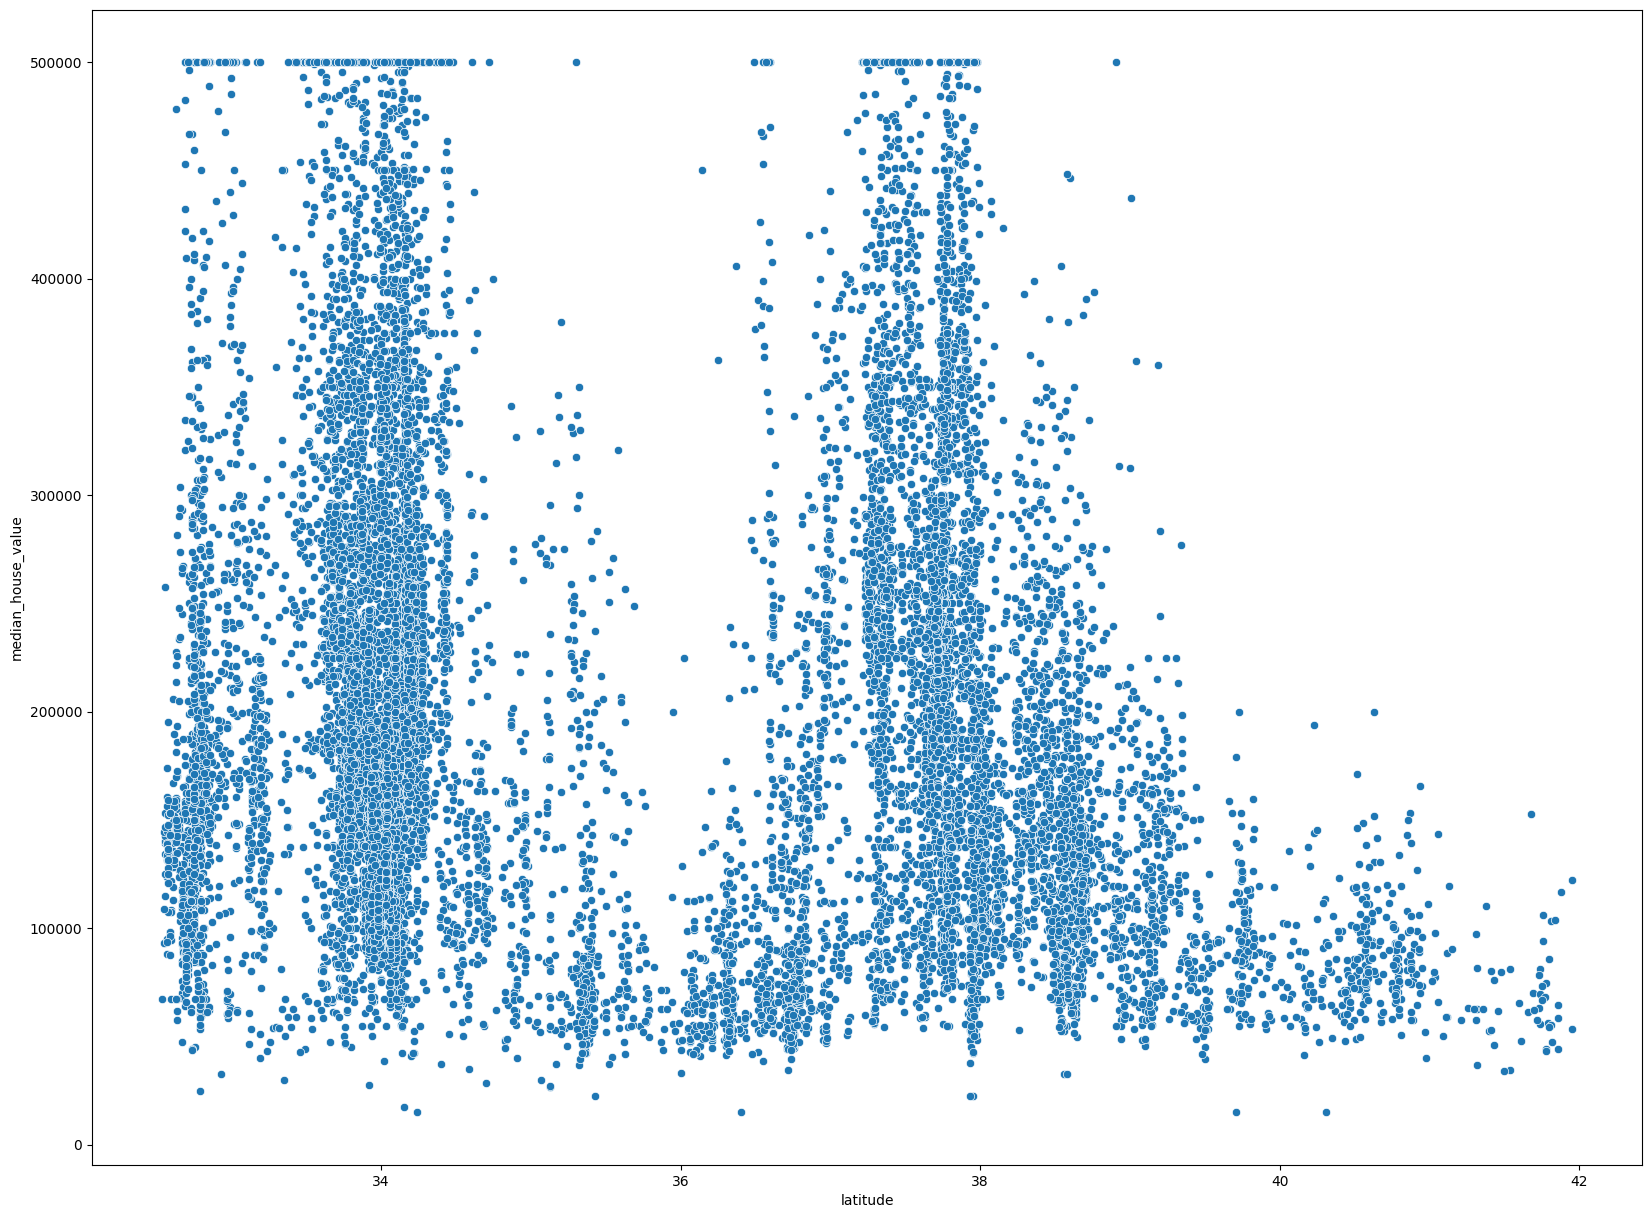

In [ ]:
plt.figure(figsize= (20,15))

sns.scatterplot(x = cal_df['latitude'], y = cal_df['median_house_value'])

<Axes: ylabel='latitude'>

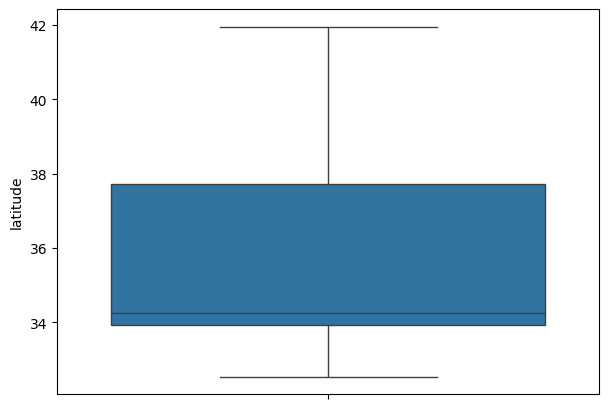

In [ ]:
plt.figure(figsize= (7,5))

sns.boxplot(cal_df['latitude'])

<Axes: ylabel='median_house_value'>

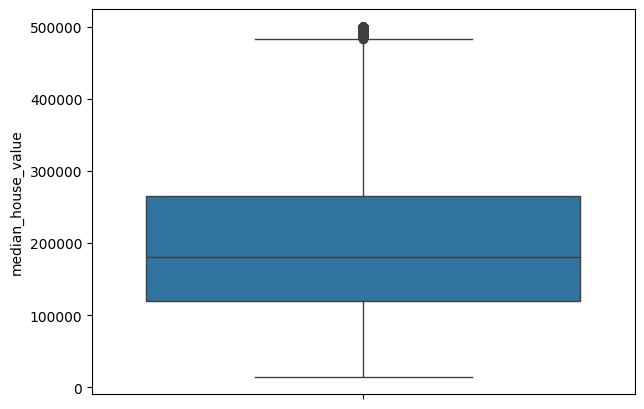

In [ ]:
plt.figure(figsize= (7,5))

sns.boxplot(cal_df['median_house_value'])

<Axes: ylabel='median_house_value'>

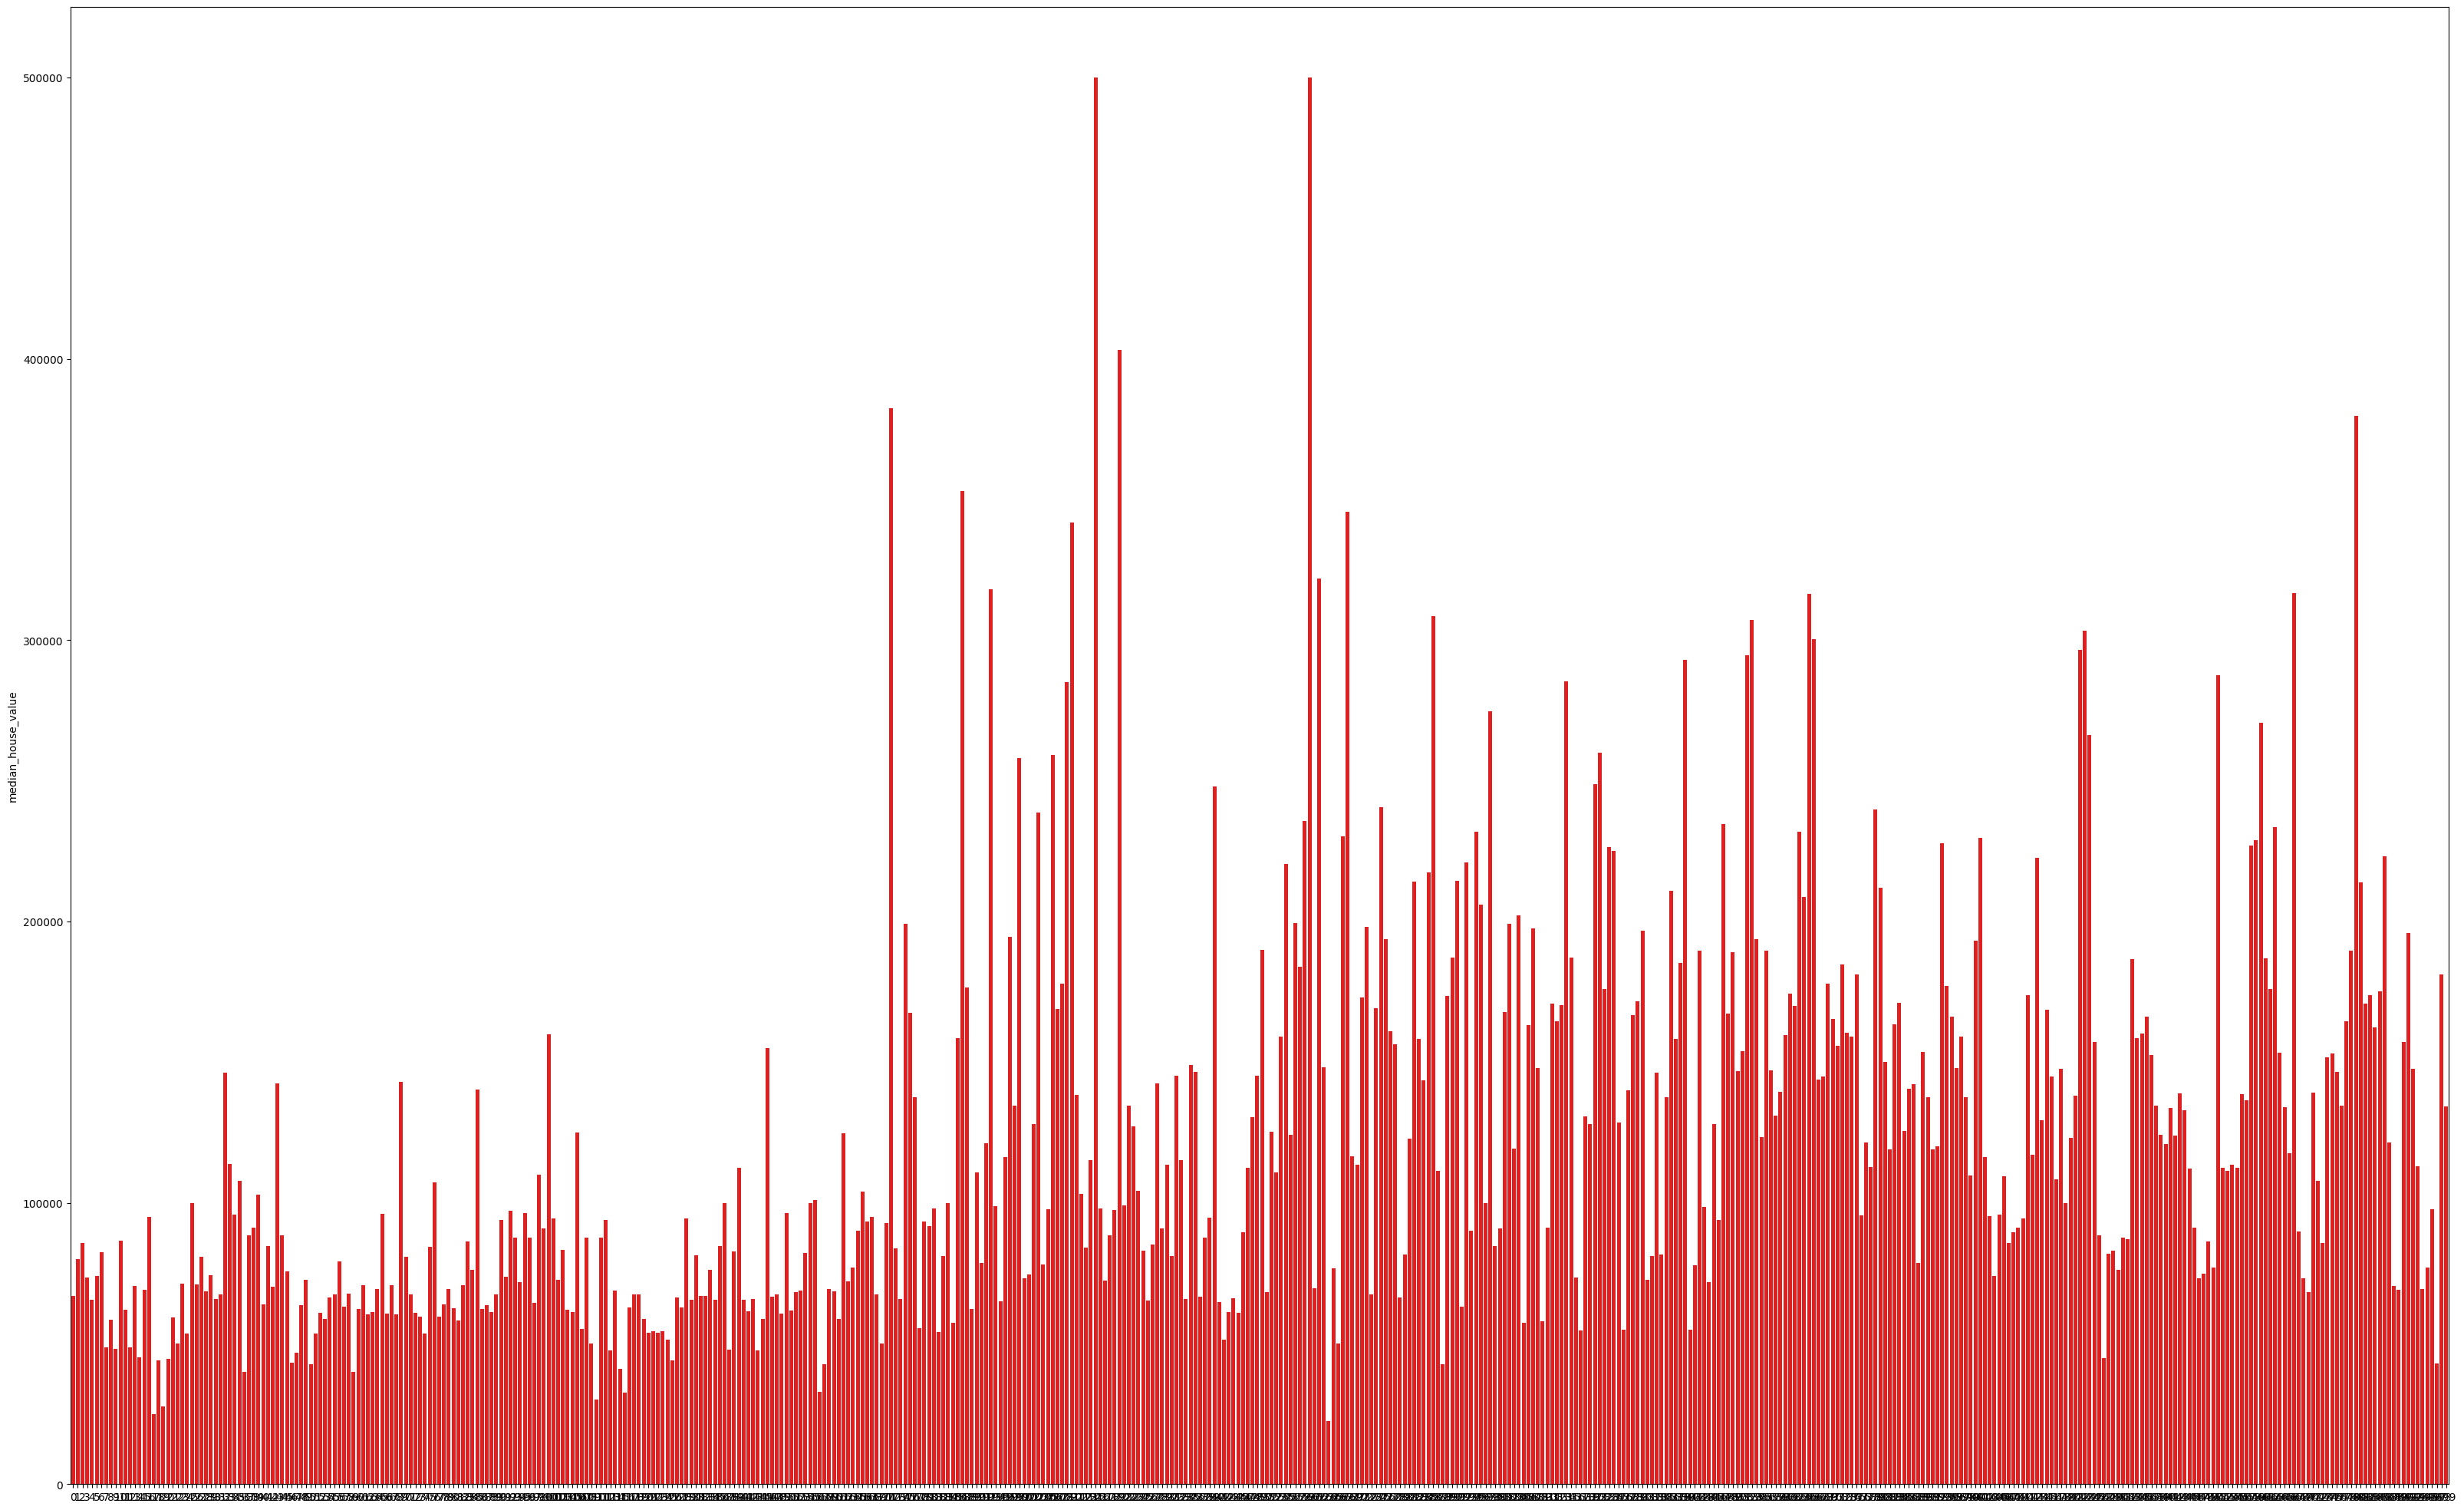

In [ ]:
plt.figure(figsize = (40, 25))

sns.barplot(cal_df['median_house_value'][0:500], color = 'red')

In [ ]:
cal_df['median_house_value']

159900.0

In [ ]:
cal_df['latitude'].duplicated().sum()

16160